# **Capstone Project 3 - E-Commerce Customer Churn**

Created by : Jessica Seanjaya

## **1. Business Problem Understanding**

**Context**  
Sebuah divisi data science dan big data dalam suatu perusahaan e-commerce diminta untuk mengidentifikasi customer yang memiliki kecenderungan untuk berhenti berlangganan, dikenal juga dengan istilah **customer churn**. Perusahaan ingin melakukan pencegahan customer churn dengan memberikan promo-promo menarik untuk meningkatkan loyalitas customer dan mengurangi jumlah customer churn menjadi tidak churn.

**Problem Statement**  
Fenomena customer churn dapat disebabkan karena beberapa hal, menurut Matuszelanski dan Kopczewska berikut adalah beberapa hal yang dapat mempengaruhi kecenderungan customer churn:  
1. Total bayar pemesanan pertama
2. Jumlah item yang dipesan
3. Biaya ongkos kirim
4. Kategori barang yang dibeli
5. Demografis customer
6. Lokasi customer

Sedangkan berdasarkan Hadi dan Hati, beberapa faktor yang mempengaruhi customer churn antara lain:  
1. Jenis kelamin
2. Lamanya customer menetap
3. Jumlah pesanan
4. Biaya ongkos kirim

Oleh karena itu, pada analisa kali ini divisi ingin menganalisa faktor-faktor yang mempengaruhi customer churn berdasarkan data-data yang dimiliki perusahaan e-commerce. Dengan demikian, perusahaan e-commerce dapat melakukan strategi untuk mencegah customer churn.

Referensi:  
1. Matuszzelanski, Kamil and Kopczewska, Katarzyna. 2022. Customer Churn in Retail E-Commerce Business: Spatial and
Machine Learning Approach. Journal of Theoretical and Applied Electronic Commerce Research, 17, 165-198.
2. Hadi, Muhammad and Hati, Sri Rahayu Hijrah. 2021. Customer Churn Rate Analysis in Fashion E-Commerce Using Logistic
Regression and Random Forest. The 6th International Conference on Management in Emerging Markets (ICMEM 2021). ISBN: 978-623-92201-2-9

**Goals**  
Perusahaan ingin menganalisa kemampuan customer yang dapat churn di waktu mendatang, tentunya hal ini sangat dihindari oleh perusahaan karena berpengaruh terhadap pendapatan perusahaan. Adapun berdasarkan referensi, Customer Acquisition Cost (CAC) pada  e-commerce berkisar antara 45-50 USD, sehingga apabila e-commerce tidak dapat mempertahankan customer maka e-commerce akan kehilangan biaya yang sebelumnya pernah dikeluarkan dan harus mengeluarkan biaya lainnya untuk mendapatkan 1 customer. Dengan menggunakan machine learning, kita dapat menganalisa faktor dan variable apa saja yang berpengaruh terdapat customer churn dan dapat membuat strategi bisnis untuk meningkatkan loyalitas customer.

Referensi:
1. https://scalecrush.io/blog/average-customer-acquisition-cost-ecommerce#:~:text=The%20average%20CAC%20on%20the,to%20acquire%20a%20single%20customer diakses pada 19 Februari 2023 pukul 21.00 WIB.

**Analytic Approach**  
Setelah perusahaan memprediksi customer yang churn, selanjutnya kita dapat membuat program dan strategi untuk dapat mempertahankan customer yang akan churn.

**Metric Evaluation**  

|       | **N-Prediction**| **P-Prediction** |
| --- | --- | --- |
| **N-Actual**     | TP | FP |
| **P-Actual**      | FN | TP |

Target:   
0 : Customer tidak *churn*  
1 : Customer *churn*

Condition:  
1. True Positive -> Customer churn  
2. False Positive (Type 1 error) -> Customer tidak churn tapi terprediksi Churn  
Konsekuensi: Biaya promosi yang dikeluarkan oleh perusahaan tidak tepat atau untuk customer yang sebenarnya tidak churn.  
3. True Negative -> Customer tidak churn  
4. False Negative (Type 2 error) -> Customer churn tapi terprediksi tidak churn.
Konsekuensi: Customer churn dan tidak lagi menggunakan layanan perusahaan.    

Model yang diinginkan adalah model yang dapat mengoptimalkan biaya promosi hanya ditujukan ke customer yang memiliki kecenderungan untuk churn dan memutuskan untuk tidak churn. Sehingga, metrics yang cocok digunakan pada model ini adalah **ROC_AUC**.     

Menurut Park Seong Ho, Receiver Operating Characteristic (ROC) merupakan kurva antara sensitivitas uji atau positif sesungguhnya (TPR) (koordinat y) dengan 1-spesifisitas atau positif palsu (FPR) (koordinat x) dan merupakan metode yang efektif untuk mengevaluasi kinerja tes diagnostik. Adapun metode pengukuran yang paling dikenal adalah pengukuran area di bawah kurva/Area Under Curve (AUC) yang menginterpretasikan nilai rata-rata sensitivitas untuk semua kemungkinan nilai speisfisitas.

Sehingga, strategi yang digunakan pada model ini adalah :
1. Memaksimalkan nilai **Recall/True Positive Rate**
2. Meminimalkan **False Positive Rate**

Referensi:  
1. Park, Seong Ho dan Goo, Jin Mo dan Jo. Chan-Hee. 2004. Receiver Operating Characteristic (ROC) Curve : Practical Review for Radiologist. Korean J Radiol 5(1): 11-18. doi:  10.3348/kjr.2004.5.1.11

# **2. Data Understanding**

Sumber Dataset : https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves?usp=share_link  

Note:  
1. Sebagian besar fitur bersifat kategorik (Nominal, Ordinal, Binary)
2. Setiap baris data merepresentasikan satu informasi customer yang pernah berbelanja di e-commerce

### **Attribute Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Masa tenor customer |
| WarehouseToHome | Float | Jarak antara gudang dengan rumah customer |
| NumberOfDeviceRegistered | Integer | Jumlah perangkat yang terdaftar  |
| PreferedOrderCat | Text | Kategori pesanan customer bulan sebelumnya |
| SatisfactionScore | Integer | Skor kepuasan customer |
| MaritalStatus | Text | Status pernikahan customer |
| NumberOfAddress | Integer | Jumlah alamat yang terdaftar |
| Complain | Integer | 0 - Tidak ada complain, 1 - ada complain |
| DaySinceLastOrder | Float | Hari sejak pesanan terakhir |
| CashbackAmount | Float |  Rata-rata Cashback bulan lalu |
| Churn | Integer | 0 - Tidak churn, 1 - Churn |

### **Library**

Sebelum mulai menganalisa, hal pertama yang harus kita lakukan adalah menyiapkan library-library yang dibutuhkan. Apabila ada library yang belum diinstall, maka kita harus menginstall library tersebut. 

In [124]:
# Data Frame Library
import numpy as np
import pandas as pd

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import Image

# Feature Engineering Library
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Model Selection Library
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

# Evaluation
import shap 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Addition
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [125]:
# Load Dataset
df = pd.read_csv("E:\Purwadhika\Course\Module3\CapstoneProject3\Dataset\data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### **Data Exploration 1**
Pada bagian ini kita akan melihat informasi dari dataset sebagai berikut:
1. Informasi jumlah kolom, jumlah baris, dan datatype dari dataset tersebut
2. Melihat adanya missing value
3. Melihat adanya duplikat data
4. Melihat deskripsi dataset

In [126]:
# 1. Informasi jumlah kolom, jumlah baris, dan datatype dari dataset tersebut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Conclusion**  
Berdasarkan data di atas, dapat kita ketahui bahwa data terdiri dari 11 kolom dan 3941 baris. Adapun datatype pada dataset di atas sudah sesuai dan tidak diperlukan adanya correction datatype.

In [127]:
# 2. Melihat adanya missing value
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [128]:
df.duplicated().sum()

671

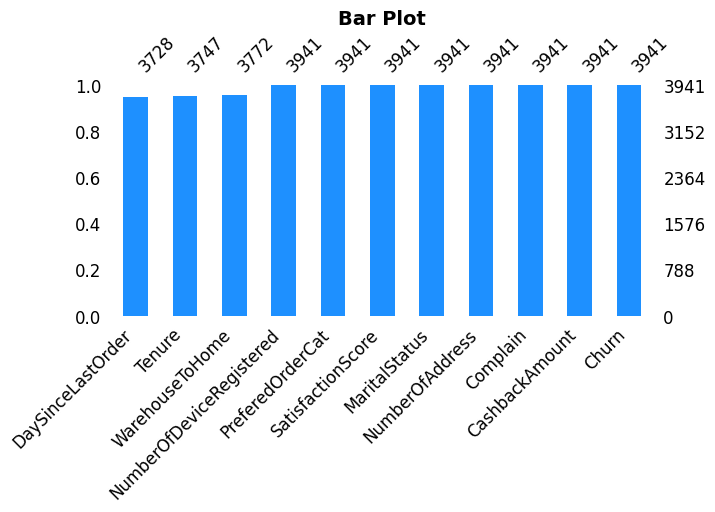

In [129]:
#Bar plot
msno.bar(df,color='dodgerblue', sort='ascending', figsize=(7,3), fontsize=12).set_title('Bar Plot', size=14, weight='bold');

In [130]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


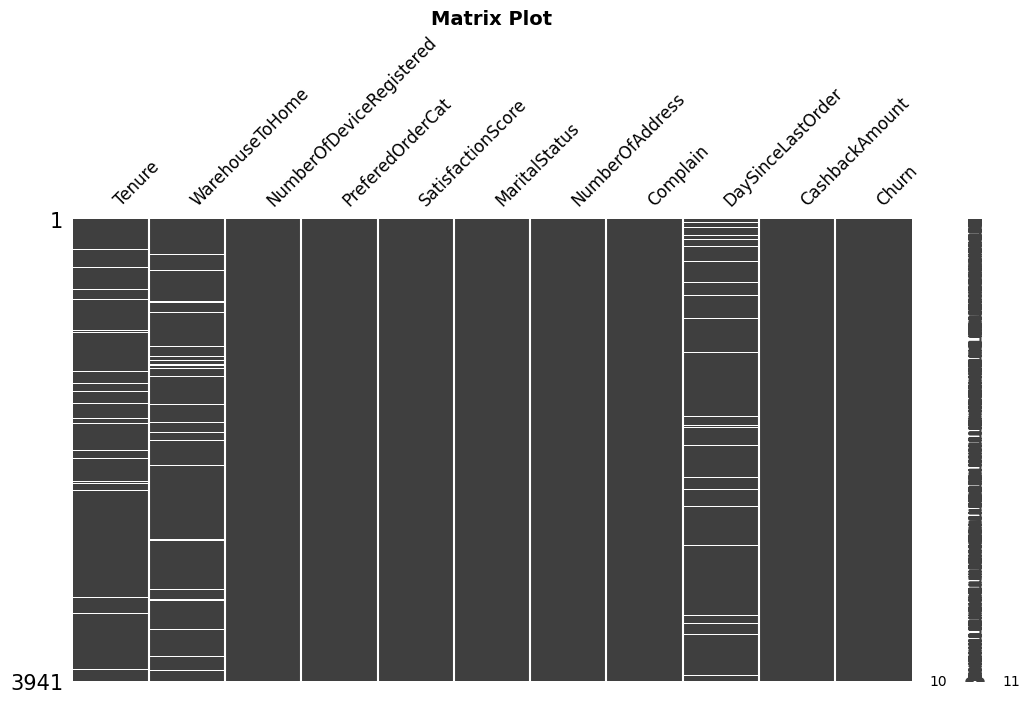

In [131]:
#Matrix Plot
msno.matrix(df, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

**Conclusion**  
Terdapat beberapa feature yang memiliki missing value yaitu **Tenure, WarehouseToHome, DaySinceLastOrder**.
Berdasarkan matrix plot, dapat dilihat persebaran missing value (garis berwarna putih) menunjukkan pola yang acak

In [132]:
# 3. Melihat adanya duplikat data
display(df[df.duplicated(subset=None)].count())

Tenure                      637
WarehouseToHome             637
NumberOfDeviceRegistered    671
PreferedOrderCat            671
SatisfactionScore           671
MaritalStatus               671
NumberOfAddress             671
Complain                    671
DaySinceLastOrder           639
CashbackAmount              671
Churn                       671
dtype: int64

**Conclusion**  
Terdapat sebanyak **671 data** yang duplikat.

In [133]:
# 4. Melihat deskripsi dataset
df.describe(include='object').T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


**Conclusion**  
Terdapat 6 kategori data pada kategori pesanan customer pada pesanan sebelumnya dengan kategori terbanyak yaitu **Laptop & Accessory**.  
Terdapat 3 kategori data pada status pernikahan customer dengan kategori terbanyak yaitu **Married**.

In [134]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


### **Data Exploration 2**  
Pada bagian ini, kita akan melakukan exploratory data untuk menjawab beberapa pertanyaan berikut:
1. Apakah dataset (feature: Churn) imbalanced atau tidak ?
2. Bagaimana profil customer yang churn ?
3. Apakah terdapat feature yang outlier ?
4. Apakah feature predictor terbaik ?
5. Apa feature yang memiliki korelasi paling tinggi dengan feature target ?

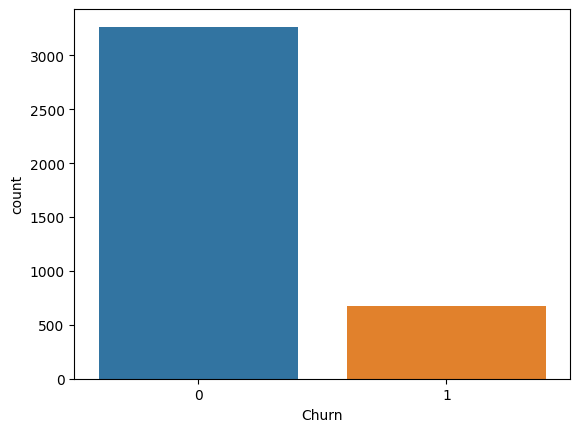

0    0.828977
1    0.171023
Name: Churn, dtype: float64


In [135]:
# 1. Melihat dataset yang imbalanced atau tidak
sns.countplot(x='Churn',data=df)
plt.show()

persentase = df['Churn'].value_counts()/df.shape[0]
print(persentase)

**Conclusion**  
Berdasarkan analisa di atas, dataset (feature: Churn) bersifat imbalanced dengan persentase perbandingan 82,9% : 17,1%.

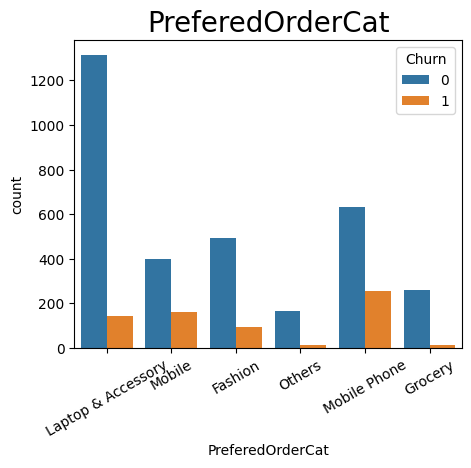

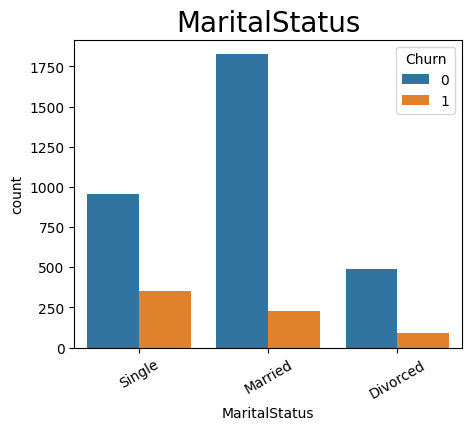

In [136]:
# 2. Melihat profil customer yang churn
for a in df.describe(include='object').columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x=a,data=df,hue='Churn')
    plt.title(a, fontsize=20)
    plt.xticks(rotation=30)
    plt.show()

**Conclusion**  
Berdasarkan hasil analisa di atas, dapat ditarik kesimpulan bahwa profil customer yang memiliki potensi churn adalah customer dengan kategori pembelanjaan terakhir adalah **Laptop & Accessory** dan status **Married**.

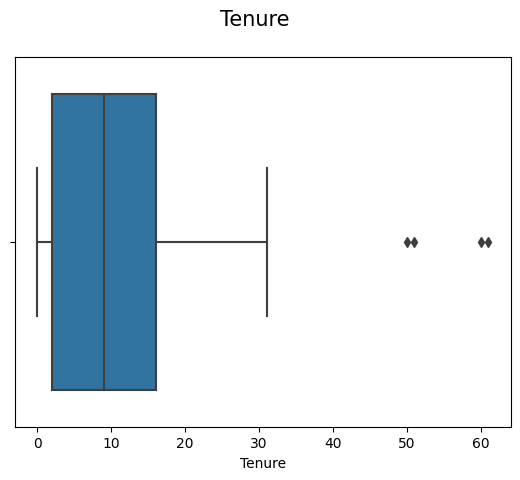

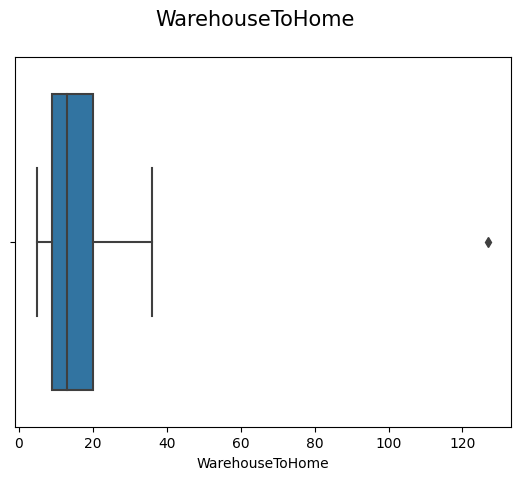

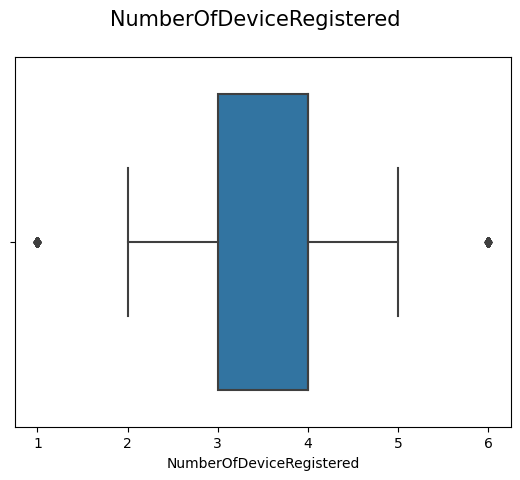

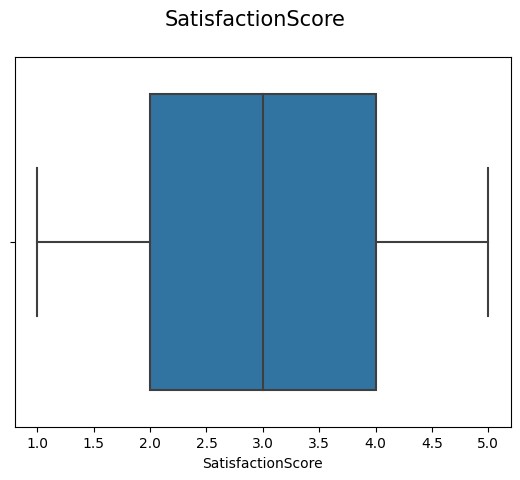

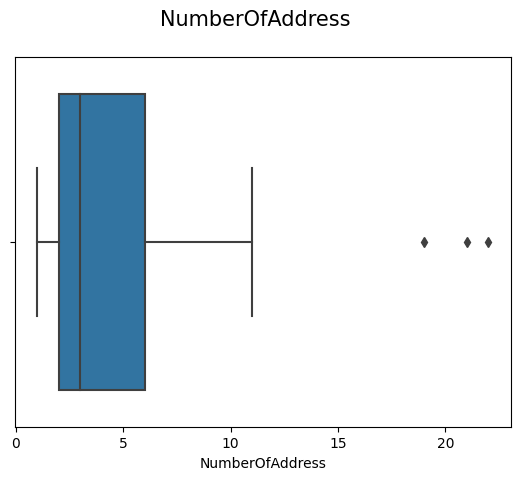

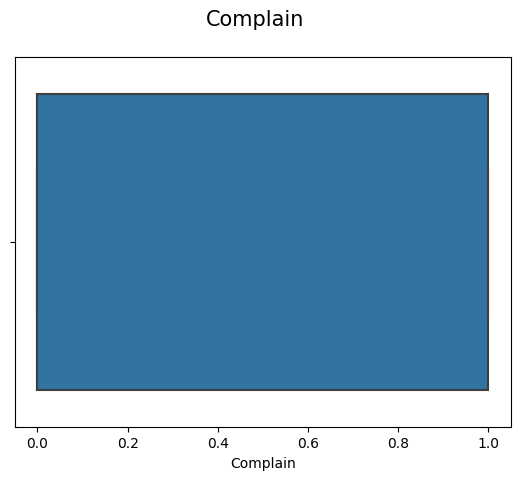

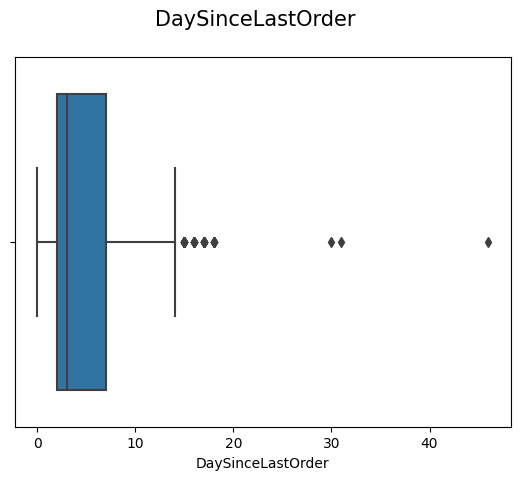

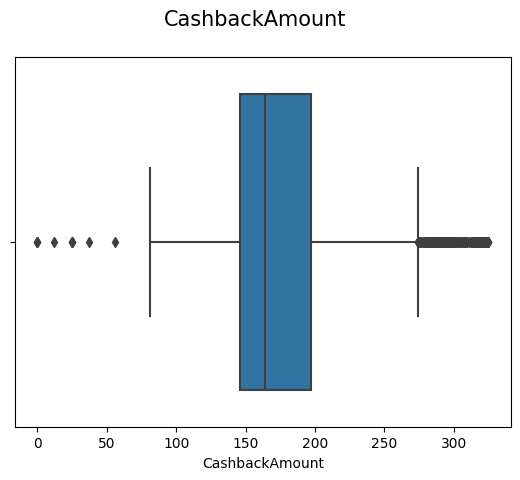

In [137]:
# 3. Melihat feature yang outlier
for a in df.describe(exclude='object').columns[:-1]:
  plt.suptitle(a, fontsize=15)
  sns.boxplot(data=df.drop_duplicates(subset=None, keep='first'),x=a,hue='Churn')
  plt.show()

**Conclusion**  
Terdapat beberapa feature yang memiliki data outlier, antara lain:
1. Tenure
2. WarehouseToHome
3. NumberOfDeviceRegistered
4. NumberOfAddress
5. DaySinceLastOrder
6. CashbackAmount

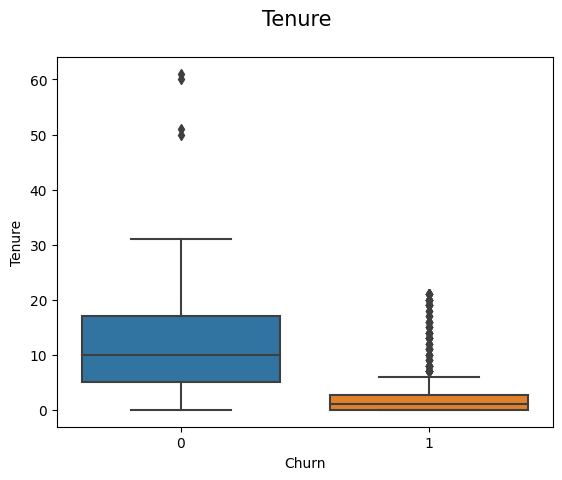

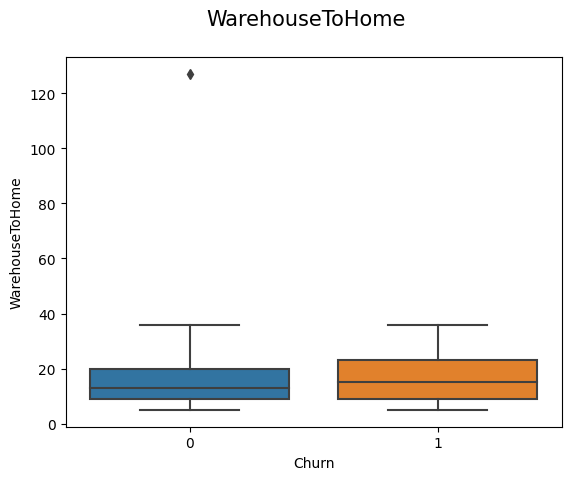

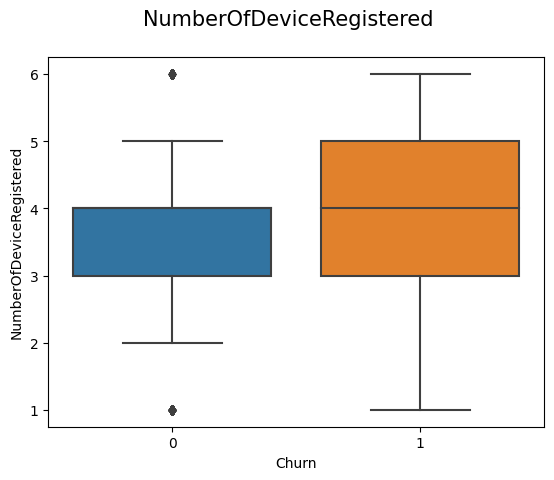

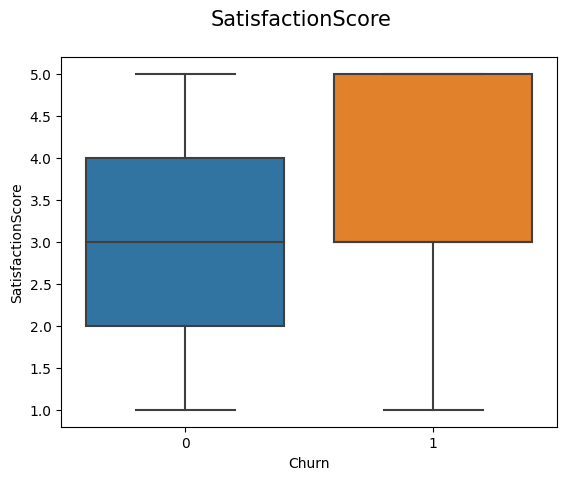

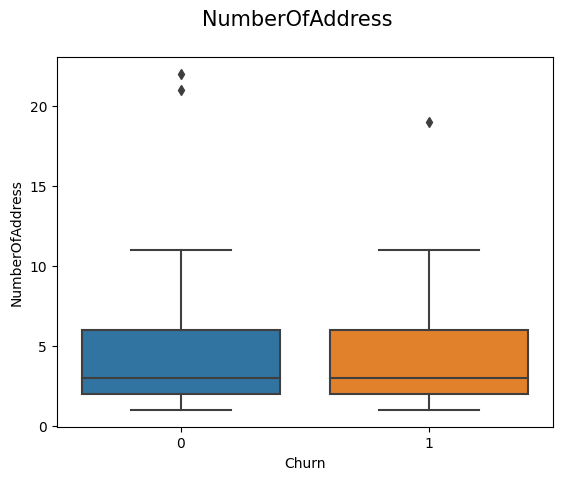

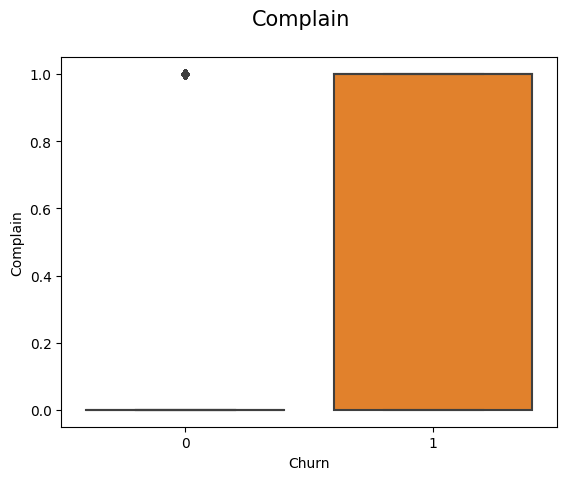

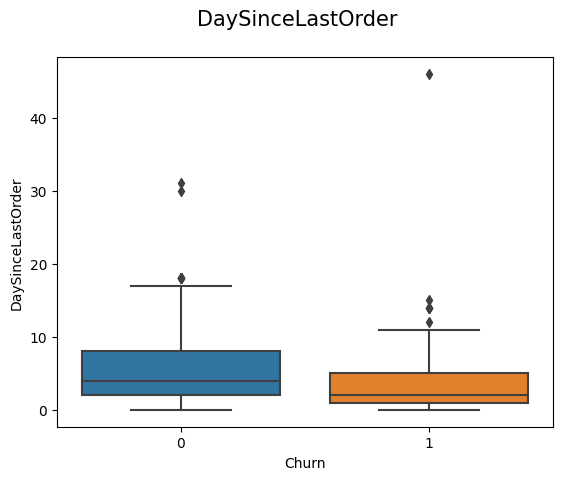

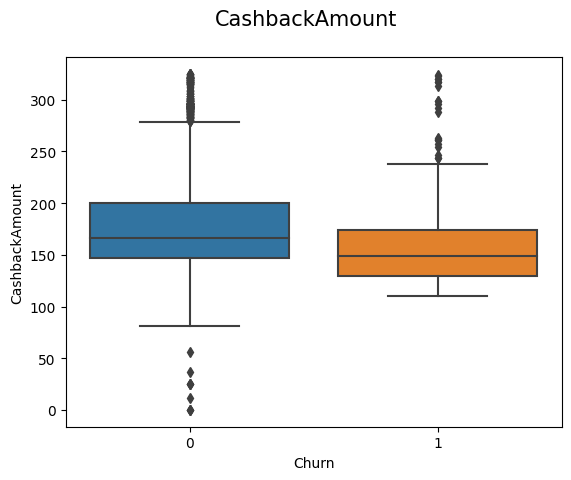

In [138]:
# 4. Mencari feature predictor terbaik
for a in df.describe(exclude='object').columns[:-1]:
    plt.suptitle(a, fontsize=15)
    sns.boxplot(data=df, y=a, x='Churn')
    plt.show()

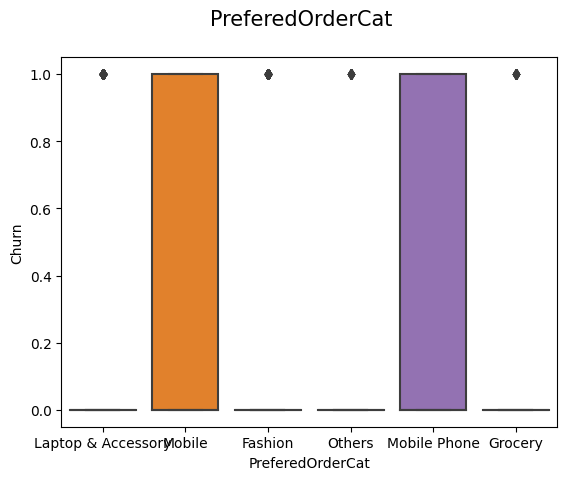

In [139]:
for a in df.describe(include='object').columns[:-1]:
    plt.suptitle(a, fontsize=15)
    sns.boxplot(data=df, x=a, y='Churn')
    plt.show()

**Conclusion**  
Berdasarkan diagram di atas, terdapat beberapa kemungkinan feature yang dapat menjadi prediktor terbaik:
1. Tenure
2. NumberofDeviceRegistered
3. SatisfactionScore
4. Complain
5. CashbackAmount
6. PreferedOrderCat

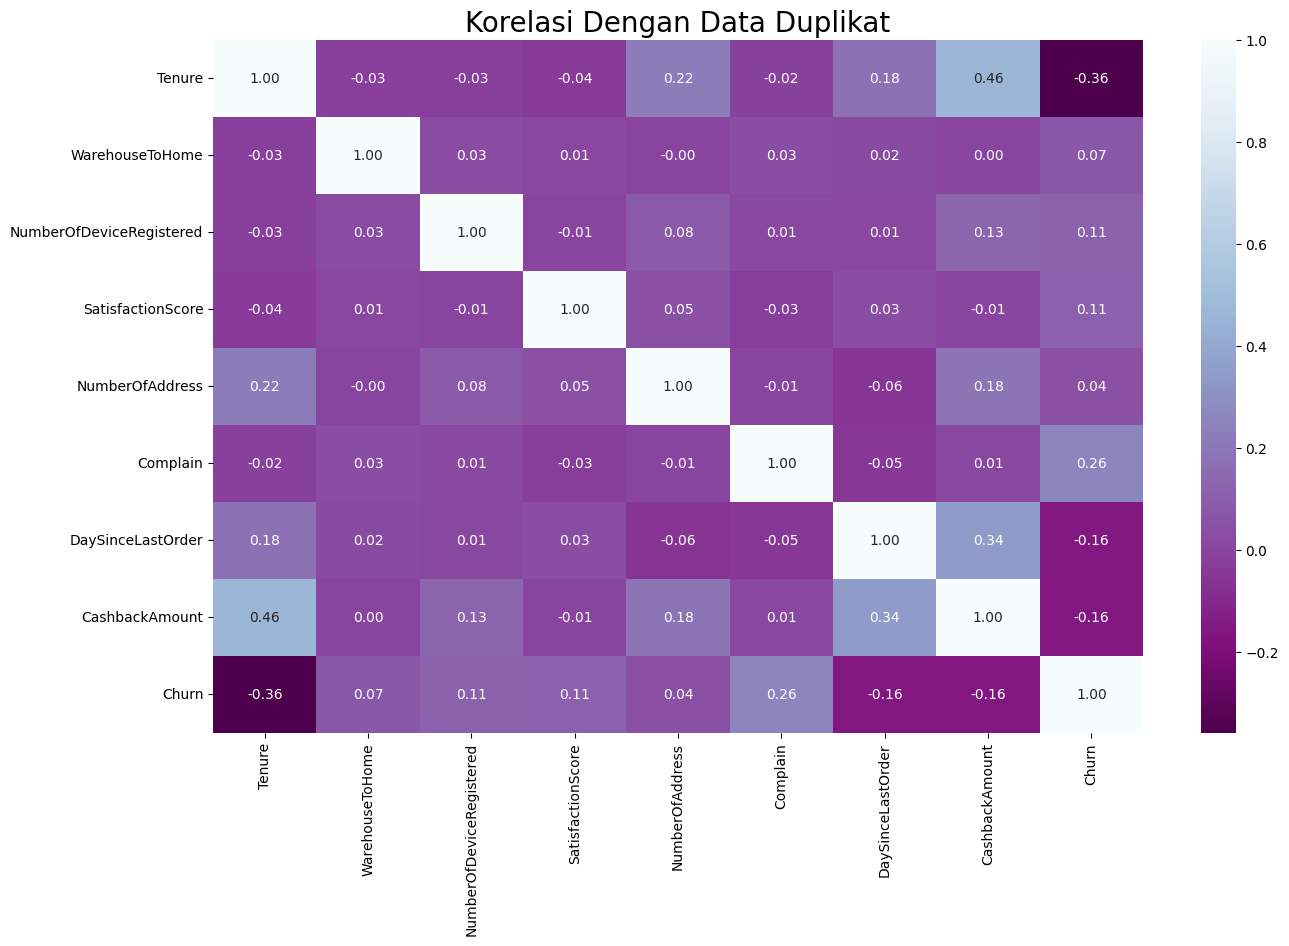

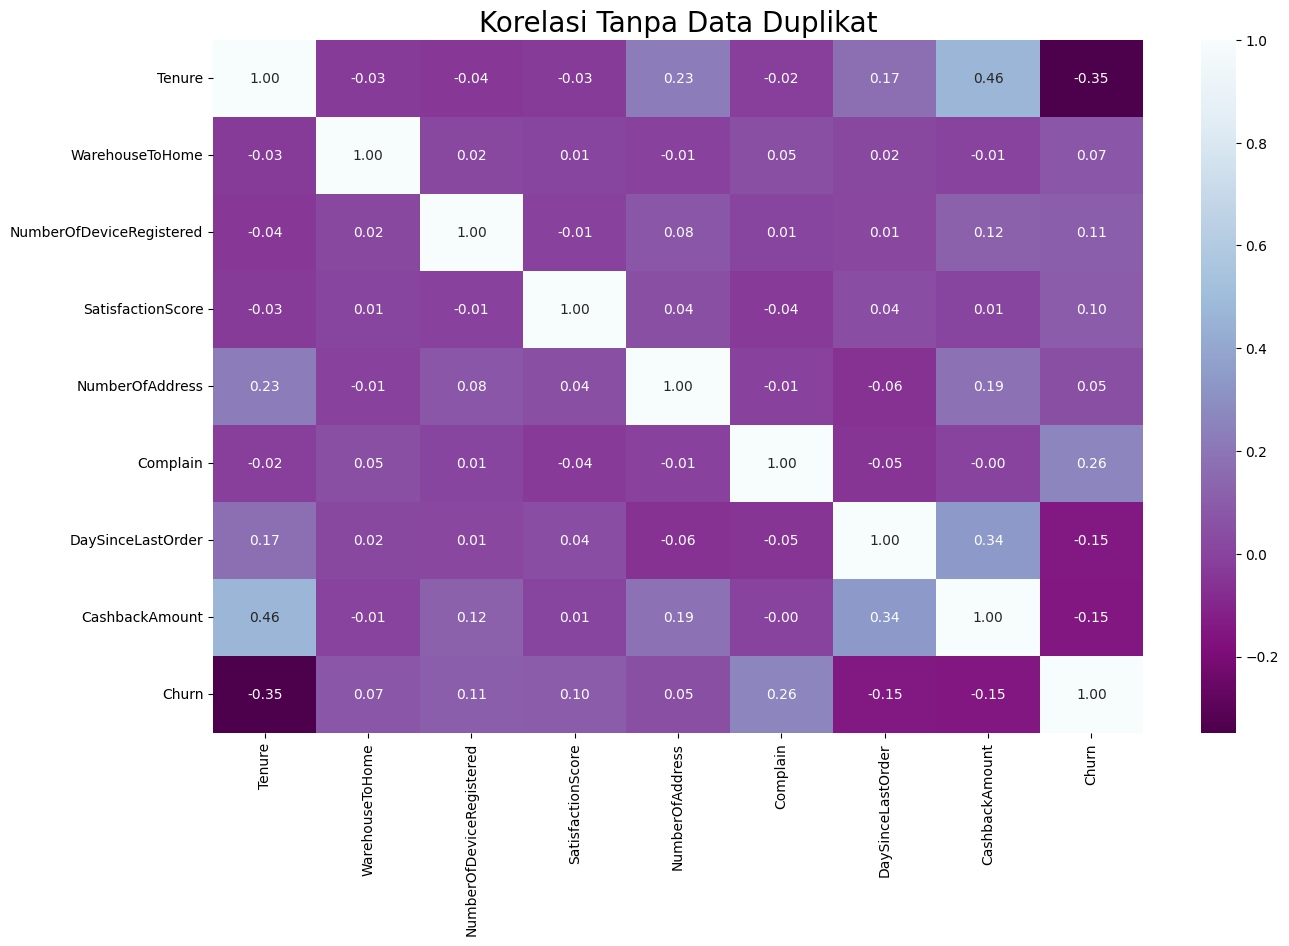

In [140]:
# 5. Mencari feature korelasi tertinggi dengan feature target (feature: Churn)
df_dengan_dup = df.corr(method='pearson')
df_tanpa_dup = df.drop_duplicates(subset=None, keep='first').corr(method='pearson')

plt.figure(figsize=(15,9))
sns.heatmap(data=df_dengan_dup, annot=True, fmt='.2f',cmap='BuPu_r')
plt.title('Korelasi Dengan Data Duplikat', fontsize=20)
plt.show()

plt.figure(figsize=(15,9))
sns.heatmap(data=df_tanpa_dup, annot=True, fmt='.2f', cmap='BuPu_r')
plt.title('Korelasi Tanpa Data Duplikat', fontsize=20)
plt.show()

**Conclusion**  
Berdasarkan data di atas, dapat disimpulkan bahwa feature **Tenure** memiliki korelasi yang paling tinggi terhadap feature Churn baik pada analisis antara dengan data duplikat ataupun tanpa data duplikat. Adapun tidak terdapat perbedaan signifikan pada data duplikat ataupun non-duplikat.  
Sehingga dapat diasumsikan bahwa feature **Tenure** merupakan feature prediktor terbaik pada dataset ini. 

# **3. Data Cleaning**

## **A. Drop Data Duplikat**
Pada bagian ini akan dilakukan analisa terhadap value unique terhadap masing-masing feature.

In [141]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Berdasarkan data di atas, terdapat 2 kategori yang sama pada feature PreferedOrderCat yaitu **Mobile** dan **Mobile Phone**, sehingga pada bagian ini data tersebut akan digabungkan menjadi **Mobile Phone**.

In [142]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [143]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Selanjutnya, dilakukan perhitungan jumlah data duplikat terhadap data yang sudah disesuaikan.

In [144]:
df.duplicated().sum()

672

Terdapat peningkatan jumlah data duplikat dari yang semula **671** baris pada analisa di poin 1 menjadi **672** baris dari 3941 data atau sebesar **17,05%**,  dimana data duplikat tersebut menunjukkan data yang benar-benar duplikat sehingga data tersebut akan kita drop. Data duplikat harus dihapus untuk mendapatkan performa Machine Learning yang terbaik, karena dapat memberikan hasil yang bias karena kontaminasi data set dengan data training atau sebaliknya.  
Reference:  
1. https://deepchecks.com/what-is-data-cleaning/ diakses pada 11 Februari 2023 pukul 17.00 WIB

In [145]:
df.drop_duplicates(inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3134 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3088 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


## **B. Handling Missing Values**

In [147]:
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Adapun feature yang memiliki missing values antara lain:  
- Tenure
- WarehouseToHome
- DaySinceLastOrder

Selanjutnya, kita akan melakukan pengisian missing values menggunakan beberapa metode untuk data yang bersifat numerikal sebagai berikut:
1. Simple imputer (mean)
2. KNN Imputer (n_neighbour 3)
3. Iterative Imputer (MICE)

In [148]:
def missing_value(a):
    kolom_misval = ['DaySinceLastOrder', 'Tenure', 'WarehouseToHome']
    df_new = df.copy()
    if a == 'mean':
        imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
    elif a == 'knn':
        imputer = KNNImputer(n_neighbors=3)
    elif a == 'mica':
        imputer = IterativeImputer(random_state=0)

    # Fit Transform
    imputer.fit(df_new[kolom_misval])
    imputer = imputer.transform(df_new[kolom_misval])
    
    df_new_2 = pd.DataFrame(columns = kolom_misval, data = imputer)
    df_new[kolom_misval] = imputer
    
    return df_new

In [149]:
# dataframe
missing_kolom = ['DaySinceLastOrder', 'Tenure', 'WarehouseToHome']
df_new = df.copy()

# SI
df_si = missing_value('mean')

# KNN
df_knn = missing_value('knn')

# MICE
df_mica = missing_value('mica')

In [150]:
# Recalculate
def kalkulasi(df, metrik):
    if metrik == 'std':
        return round(df['DaySinceLastOrder'].std(), 2), round(df['Tenure'].std(), 2), round(df['WarehouseToHome'].std(), 2)
    else:
        return round(df['DaySinceLastOrder'].mean(), 2), round(df['Tenure'].mean(), 2), round(df['WarehouseToHome'].mean(), 2)

In [151]:
# Calculate standard with missing value
day_last_mean = round(df_new['DaySinceLastOrder'].mean(), 2)
day_las_std = round(df_new['DaySinceLastOrder'].std(), 2)

tenure_mean = round(df_new['Tenure'].mean(), 2)
tenure_std = round(df_new['Tenure'].std(), 2)

warehouse_mean = round(df_new['WarehouseToHome'].mean(), 2)
warehouse_std = round(df_new['WarehouseToHome'].std(), 2)

In [152]:
# MEAN
day_last_mean_si, tenure_mean_si, warehouse_mean_si = kalkulasi(df_si, 'mean')
day_last_std_si, tenure_std_si, warehouse_std_si = kalkulasi(df_si, 'std')

# KNN
day_last_mean_knn, tenure_mean_knn, warehouse_mean_knn = kalkulasi(df_knn, 'mean')
day_las_std_knn, tenure_std_knn, warehouse_std_knn = kalkulasi(df_knn, 'std')

# MICA
day_last_mean_mica, tenure_mean_mica, warehouse_mean_mica = kalkulasi(df_mica, 'mean')
day_last_mean_mica, tenure_mean_mica, warehouse_mean_mica = kalkulasi(df_mica, 'std')

In [153]:
df_perbandingan = pd.DataFrame(columns = ['Kolom', 'Metode Imputer', 'Nilai Mean Awal', 'Nilai Mean Akhir', 'Nilai Std Awal', 'NIlai Std Akhir'],
                       data = [['DaySinceLastOrder', 'Simple Imputer', day_last_mean, day_last_mean_si, day_las_std, day_last_std_si], 
                               ['Tenure', 'Simple Imputer', tenure_mean, tenure_mean_si, tenure_std, tenure_std_si], 
                               ['WarehouseToHome', 'Simple Imputer', warehouse_mean, warehouse_mean_si, warehouse_std, warehouse_std_si],
                               
                               ['DaySinceLastOrder', 'KNN Imputer', day_last_mean, day_last_mean_knn, day_las_std, day_las_std_knn], 
                               ['Tenure', 'KNN Imputer', tenure_mean, tenure_mean_knn, tenure_std, tenure_std_knn], 
                               ['WarehouseToHome', 'KNN Imputer', warehouse_mean, warehouse_mean_knn, warehouse_std, warehouse_std_knn],
                               
                               ['DaySinceLastOrder', 'Iterative Imputer', day_last_mean, day_last_mean_mica, day_las_std, day_last_mean_mica], 
                               ['Tenure', 'Iterative Imputer', tenure_mean, tenure_mean_mica, tenure_std, tenure_mean_mica], 
                               ['WarehouseToHome', 'Iterative Imputer', warehouse_mean, warehouse_mean_mica, warehouse_std, warehouse_mean_mica]])

display(df_perbandingan.set_index('Metode Imputer'))

,Kolom,Nilai Mean Awal,Nilai Mean Akhir,Nilai Std Awal,NIlai Std Akhir
Metode Imputer,,,,,
Simple Imputer,DaySinceLastOrder,4.55,4.55,3.70,3.59
Simple Imputer,Tenure,10.19,10.19,8.65,8.44
Simple Imputer,WarehouseToHome,15.51,15.51,8.57,8.39
KNN Imputer,DaySinceLastOrder,4.55,4.44,3.70,3.64
KNN Imputer,Tenure,10.19,10.06,8.65,8.53
KNN Imputer,WarehouseToHome,15.51,15.40,8.57,8.46
Iterative Imputer,DaySinceLastOrder,4.55,3.60,3.70,3.60
Iterative Imputer,Tenure,10.19,8.44,8.65,8.44
Iterative Imputer,WarehouseToHome,15.51,8.39,8.57,8.39


Berdasarkan tabel di atas, dapat disimpulkan bahwa metode Simple Imputer memberikan nilai yang mendekati distribusi nilai awal, sehingga dipilih metode Simple Imputer untuk mengisi missing value.

In [155]:
df_no_misval = df_si.copy()
df = df_si.copy()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3269 non-null   float64
 1   WarehouseToHome           3269 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3269 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


In [213]:
df[df['NumberOfDeviceRegistered']].unique()

KeyError: "None of [Int64Index([4, 4, 3, 4, 4, 4, 6, 4, 4, 3,\n            ...\n            4, 4, 3, 4, 3, 5, 4, 5, 2, 3],\n           dtype='int64', length=3269)] are in the [columns]"

## **C. Handling Outlier**

Pada bagian 1, diketahui bahwa terdapat beberapa feature yang memiliki data outlier, antara lain:
1. Tenure
2. WarehouseToHome
3. NumberOfDeviceRegistered
4. NumberOfAddress
5. DaySinceLastOrder
6. CashbackAmount  
Pada bagian ini akan dilakukan penentuan apakah outlier akan dihapus atau tidak.

In [157]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%.''')
    '/n'

Lower Bound Tenure adalah -15.0, dan Upper Bound Tenure adalah 33.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.12%.
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%.
Lower Bound NumberOfDeviceRegistered adalah 1.5, dan Upper Bound NumberOfDeviceRegistered adalah 5.5 , terdapat 226 data yang menyimpang dari data biasanya, yaitu sebanyak 6.91%.
Lower Bound NumberOfAddress adalah -4.0, dan Upper Bound NumberOfAddress adalah 12.0 , terdapat 3 data yang menyimpang dari data biasanya, yaitu sebanyak 0.09%.
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.22%.
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%.


Berdasarkan perhitungan di atas, data outlier pada kolom **NumberOfDeviceRegistered** dan **CashbackAmount** akan dibiarkan karena persentasenya besar sehingga apabila didrop akan merubah keseluruhan data. Sehingga pada analisa ini, tidak dilakukan penghilangan outlier mengingat data yang dimiliki sedikit.

# **4. Data Preparation**

## **Data Splitting**
Pada bagian ini, akan dilakukan pembagian dataset menjadi 80% training data dan 20% test data dengan random state 42.

In [160]:
df_no_misval = df_si.copy()
df = df_si.copy()

In [161]:
encoding_kolom = ['PreferedOrderCat', 'MaritalStatus']
misval_kolom = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

onehot = OneHotEncoder(drop='first')
Imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

preprocessor = ColumnTransformer([
    ('misval', Imputer, misval_kolom),
    ('encode', onehot, encoding_kolom),], remainder='passthrough')

x = df.drop(columns=['Churn'])
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# **5. Modeling**

Pada tahap ini, akan dicoba pembuatan model machine learning untuk menentukan model yang terbaik, dengan menggunakan 8 metode antara lain:
1. Logistic Regression
2. Decision Tree Classifier
3. KNeighbours Classifier
4. LGBM Classifier
5. XGB Classifier
6. Random Forest Classifier
7. Cat Boost Classifier
8. Ada Boost Classifier

In [162]:
logreg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lgbm = lgb.LGBMClassifier()
xgb = XGBClassifier(verbosity=0, silent=True)
rf = RandomForestClassifier()
catb = CatBoostClassifier(silent=True)
adab = AdaBoostClassifier()

model = [logreg, dec_tree, knn, lgbm, xgb, rf, catb, adab]
algo = ['Logistic Regression', 'Decision Tree', 'KNN', 'LightGBM', 'XGBoost', 'RF', 'Catboost', 'Adaboost']

### **A. Model Benchmarking : K-Fold**

In [163]:
score = []
average = []
std_dev = []

for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    model_cv = cross_val_score(pipeline_model, x_train, y_train,
                               cv=sk_fold, scoring='roc_auc')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
# df_default_train = 
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': average,
                   'Std ROC AUC': std_dev}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

,Mean ROC AUC,Std ROC AUC
Model,,
Catboost,0.937626,0.010070
LightGBM,0.936661,0.007257
RF,0.933841,0.013542
XGBoost,0.931960,0.012393
Adaboost,0.889118,0.008545
Logistic Regression,0.868672,0.019369
KNN,0.777755,0.010294
Decision Tree,0.762130,0.019811


Berdasarkan tabel analisa dengan metode default hyperparameter, dapat kita ketahui bahwa terdapat 3 metode yang memberikan nilai ROC AUC tertinggi antara lain:
1. Cat Boost Classifier
2. LGBM Classifier
3. Random Forest Classifier
4. XGB Classifier 
Dengan nilai median ROC AUC di atas 93 %. 

### **B. Model Benchmarking : Data Testing**

In [164]:
roc_auc = []
recall = []
confus_matrix = []
fpr = []

for i, a in enumerate(model):    
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])
    
    pipeline_model.fit(x_train, y_train)
    
    y_pred = pipeline_model.predict(x_test)
    y_pred_proba = pipeline_model.predict_proba(x_test)[:,1]
    confmat_var = confusion_matrix(y_test, y_pred)
    
    roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    recall.append(recall_score(y_test, y_pred))
    confus_matrix.append(confmat_var)
    fpr.append(confmat_var[0][1]/(confmat_var[0][1]+confmat_var[0][0]))
    print(a,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc,
                   'Recall Score': recall,
                   'FPR': fpr,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       547
           1       0.73      0.50      0.60       107

    accuracy                           0.89       654
   macro avg       0.82      0.73      0.77       654
weighted avg       0.88      0.89      0.88       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       547
           1       0.62      0.65      0.64       107

    accuracy                           0.88       654
   macro avg       0.78      0.79      0.78       654
weighted avg       0.88      0.88      0.88       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       547
           1       0.57      0.36      0.45       107

    accuracy                           0.85       654
   macro avg       0.73      0.66      0.68       654

,ROC AUC Score,Recall Score,FPR
Model,,,
Catboost,0.969314,0.766355,0.031079
XGBoost,0.962156,0.766355,0.032907
LightGBM,0.960567,0.757009,0.031079
RF,0.955364,0.663551,0.034735
Adaboost,0.937185,0.616822,0.036563
Logistic Regression,0.917101,0.504673,0.036563
KNN,0.815331,0.364486,0.053016
Decision Tree,0.787798,0.654206,0.078611


Berdasarkan analisis pada dataset, dapat disimpulkan bahwa 3 metode yang memberikan nilai ROC AUC Score yang paling baik antara lain:
1. Cat Boost Classifier
2. XGB Classifier
3. LGBM Classifier
Dengan keempat metode di atas memberikan nilai ROC AUC Score di atas 96%.

Sedangkan 3 metode yang memberikan False Positive Rate (FPR) terendah antara lain:
1. Cat Boost Classifier
2. LGBM Classifier
3. XGB Classifier
Dengan persentase FPR di bawah 3,3%.

Recall Score merupakan alat untuk mengukur performa model dalam mengukur jumlah True Positive Rate terhadap keseluruhan nilai positif aktual. Dimana Recall Score = True Positive / (True Positive + False Negative). Berdasarkan Recall Score, diperoleh 3 metode yang memberikan nilai paling tinggi antara lain:
1. Cat Boost Classifier
2. XGB Classifier
3. LGBM Classifier
Dengan persentase Recall Score di ats 65%.

Berdasarkan nilai ROC AUC, FPR, dan Recall Score, dapat diketahui bahwa 3 metode analisa terbaik yaitu:
1. XGB Classifier
2. Cat Boost Classifier
3. LGBM Classifier

Selanjutnya akan dilakukan analisa oversampling test untuk ketiga metode di atas.

### **C. Oversampling Test**

In [165]:
print(f'Ukuran dataset: {df.shape}')
display(df['Churn'].value_counts())
display((df['Churn'].value_counts()/df.shape[0])*100)

Ukuran dataset: (3269, 11)


0    2736
1     533
Name: Churn, dtype: int64

0    83.69532
1    16.30468
Name: Churn, dtype: float64

Berdasarkan analisa sebelumnya, dimana dataset (Churn) memiliki profil yang imbalance, dengan nilai 0 (tidak churn) memiliki nilai yang lebih banyak (83,7%) dibandingkan nilai 1 (churn) yang hanya sebanyak 16,3%. Adapun data yang digunakan pada dataset ini hanya sebanyak 3269 data, sehingga dipilih metode test oversampling.
Metode Oversampling merupakan metode yang digunakan untuk membangkitkan sejumlah data baru  dengan cara menduplikasi dan membuat data tiruan yang serupa dengan kelas minoritas sehingga distribusinya lebih berimbang. Teknik yang digunakan pada metode ini adalah **Synthetic Minority Oversampling (SMOTE)**.

Selanjutnya akan dilakukan pemisahan dataset menjadi data training set dan data test set, dan akan dilakukan Oversampling test pada masing-masing set.

In [166]:
x_no_misval = df_no_misval.drop(columns=['Churn'])
y_no_misval = df_no_misval['Churn']

x_sampling, x_test_sampling, y_sampling, y_test_sampling = train_test_split(x_no_misval,
                                                                        y_no_misval, 
                                                                        stratify=y_no_misval,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [167]:
# training
score = []
score_avg = []
std = []

sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (4378,)


0    2189
1    2189
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
XGBoost,0.983518,0.016353
LightGBM,0.980709,0.018196
Catboost,0.978741,0.018992
RF,0.973949,0.015269
KNN,0.939435,0.000716
Adaboost,0.909429,0.018604
Decision Tree,0.880088,0.039942
Logistic Regression,0.846117,0.006284


In [169]:
# testing
recall = []
fpr_test = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('preprocess', preprocessor),('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   'FPR': fpr_test,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       547
           1       0.39      0.87      0.54       107

    accuracy                           0.76       654
   macro avg       0.68      0.80      0.69       654
weighted avg       0.87      0.76      0.79       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       547
           1       0.51      0.64      0.57       107

    accuracy                           0.84       654
   macro avg       0.72      0.76      0.73       654
weighted avg       0.86      0.84      0.85       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       547
           1       0.36      0.76      0.49       107

    accuracy                           0.74       654
   macro avg       0.65      0.75      0.66       654

0    547
1    107
Name: Churn, dtype: int64

0    83.639144
1    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,FPR
Model,,,
Catboost,0.948880,0.822430,0.082267
LightGBM,0.943925,0.831776,0.084095
XGBoost,0.941585,0.728972,0.067642
RF,0.939637,0.831776,0.089580
Adaboost,0.894599,0.803738,0.175503
Logistic Regression,0.868441,0.869159,0.266910
KNN,0.823019,0.757009,0.261426
Decision Tree,0.758342,0.635514,0.118830


Metode terbaik saat pengujian training set dan test set antara lain :
1. XGB Classifier
2. LGBM Classifier
3. Cat Boost Classifier  
Selanjutnya ketiga metode ini akan kita lakukan analisa hyperparameter tuning untuk dapat dilihat metode ML yang terbaik.

### **D. Hyperparameter Tuning**

Pada hyperparameter tuning, dipilih teknik GridSearchCV dimana GridSearchCV merupakan teknik untuk mencari nilai parameter yang optiman dari dataset yang diberikan dalam bentuk grid. GridSearchCV bekerja dengan mengkombinasikan seluruh nilaidan mengevaluasi model dari setiap kombinasi menggunakan Cross-Validation method. Dengan ini, kita dapat memilih best performance dari setiap kombinasi yang dilakukan.   
Keuntungan GridSearchCV adalah dapat menunjukkan nilai value terbaik dari keseluruhan kombinasi, sedangkan kerugian GridSearchCV yaitu proses analisa memakan waktu yang lama.

Referensi:
1. https://www.mygreatlearning.com/blog/gridsearchcv/ diakses pada 19 Februari 2023 pukul 8.00 WIB

**1. XGB Classifier**

In [170]:
model_xgboost = XGBClassifier()
hyperparam_space_xgboost=[{
    "model__learning_rate":[0.01, 0.3, 0.5],
    "model__n_estimators": [10, 100, 200],
    "model__max_depth": [1, 3, 5],
    "model__objective": ["binary:logistic"],
    "model__use_label_encoder": [False],
    "model__booster": ["gbtree"],
    "model__eval_metric": ["logloss"]}]

In [171]:
rus = SMOTENC (categorical_features=[3, 5], random_state=42)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_xgboost)])

In [172]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_xgboost, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.9883215701442436
Best params: {'model__booster': 'gbtree', 'model__eval_metric': 'logloss', 'model__learning_rate': 0.5, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__objective': 'binary:logistic', 'model__use_label_encoder': False}


In [173]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_xgboost)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [174]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynod...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [175]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.728972,0.067642,0.941585
Tuned Model,0.813084,0.074954,0.939859


ROC AUC Score Default: 
 [[510  37]
 [ 29  78]]

ROC AUC Score Tuned: 
 [[506  41]
 [ 20  87]]


In [176]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       547
           1       0.68      0.73      0.70       107

    accuracy                           0.90       654
   macro avg       0.81      0.83      0.82       654
weighted avg       0.90      0.90      0.90       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.68      0.81      0.74       107

    accuracy                           0.91       654
   macro avg       0.82      0.87      0.84       654
weighted avg       0.92      0.91      0.91       654



**2. LGBM Classifier**

In [177]:
model_lgbm = lgb.LGBMClassifier()

hyperparam_space_lgbm=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]}]

In [178]:
rus = SMOTENC (categorical_features=[3, 5], random_state=42)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_lgbm)])

In [179]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_lgbm, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
Best score: 0.989860636002226
Best params: {'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 150, 'model__num_leaves': 41, 'model__random_state': 42}


In [180]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_lgbm)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [181]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=275,
                                min_data_in_leaf=15, num_iterations=150,
                                num_leaves=41, random_state=42))])

In [182]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.831776,0.084095,0.943925
Tuned Model,0.803738,0.063985,0.945360


ROC AUC Score Default: 
 [[501  46]
 [ 18  89]]

ROC AUC Score Tuned: 
 [[512  35]
 [ 21  86]]


In [183]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       547
           1       0.66      0.83      0.74       107

    accuracy                           0.90       654
   macro avg       0.81      0.87      0.84       654
weighted avg       0.92      0.90      0.91       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       547
           1       0.71      0.80      0.75       107

    accuracy                           0.91       654
   macro avg       0.84      0.87      0.85       654
weighted avg       0.92      0.91      0.92       654



**3. CatBoost Classifier**

In [184]:
model_catboost = CatBoostClassifier(silent=True)
hyperparam_space_catboost=[{
    'model__n_estimators' : [100, 200, 300, 400, 500],
    'model__max_depth': [i for i in range(1, 11)],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],}]

In [185]:
rus = SMOTENC (categorical_features=[3, 5], random_state=42)
x_train_fin, y_train_fin = rus.fit_resample(x_train, y_train)

estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_catboost)])

In [186]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_catboost, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(x_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.9893842263658794
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 500}


In [187]:
default_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_catboost)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000023F31FEA7A0>)])

In [188]:
best_model = grid.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('misval', SimpleImputer(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000023F31F78DF0>)])

In [189]:
# Testing
y_pred_default = default_model.predict(x_test)
y_pred_proba_default = default_model.predict_proba(x_test)

y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.82243,0.082267,0.948880
Tuned Model,0.82243,0.073126,0.952793


ROC AUC Score Default: 
 [[502  45]
 [ 19  88]]

ROC AUC Score Tuned: 
 [[507  40]
 [ 19  88]]


In [190]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       547
           1       0.66      0.82      0.73       107

    accuracy                           0.90       654
   macro avg       0.81      0.87      0.84       654
weighted avg       0.91      0.90      0.91       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       547
           1       0.69      0.82      0.75       107

    accuracy                           0.91       654
   macro avg       0.83      0.87      0.85       654
weighted avg       0.92      0.91      0.91       654



**CONCLUSION**

**1. XGB Classifier**

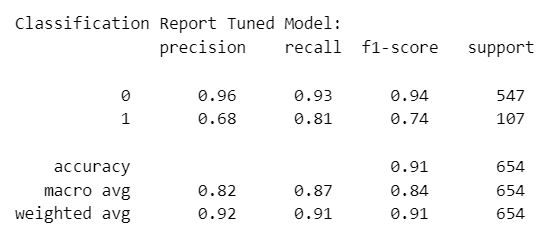

In [191]:
path = "E:/Purwadhika/Course/Module3/CapstoneProject3/image/"
Image(filename = path + "xgb.jpg", width=700, height=700)

**2. LGBM Classifier**

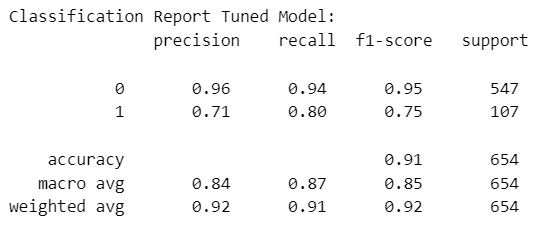

In [192]:
path = "E:/Purwadhika/Course/Module3/CapstoneProject3/image/"
Image(filename = path + "LGBM.jpg", width=700, height=700)

**3. Cat Boost Classifier**

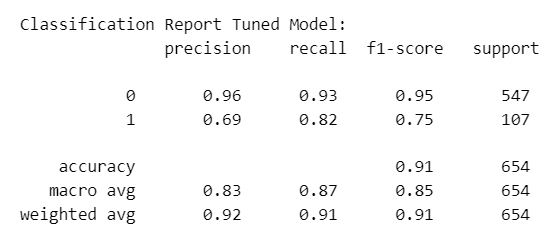

In [193]:
path = "E:/Purwadhika/Course/Module3/CapstoneProject3/image/"
Image(filename = path + "cat.jpg", width=700, height=700)

Kolom pada tabel di atas merepresentasikan sebagai berikut:
1. Precision : Metrics untuk mengukur berapa banyak hasil prediksi suatu kelas yang memang sesuai kenyataan.  Precision = TP / (TP + FP).
2. Recall : Metrics yang menyatakan seberapa besar persentase kejadian pada kelas positif yang bisa dideteksi. Recall dapat membedakan recall + (TP) dengan recall - (FN).  Recall = TP / (TP + FN).
3. F1-Score : Rataan harmonik dari presisi dan recall 

Berdasarkan hasil hyperparameter tuning dari ketiga metode di atas, diperoleh informasi bahwa ketiga metode memiliki ini memiliki nilai akurasi yang sama yaitu 91%.   

Adapun nilai recall churn (1) dari masing-masing metode sebagai berikut:
1. XGB Classifier -> Recall 1 : 81 %
2. LGBM Classifier -> Recall 1 :80 %
3. Cat Boost Classifier -> Recall 1 : 82 %

Sehingga dapat disimpulkan bahwa metode **Cat Boost Classifier** memiliki metode yang sedikit lebih baik pada dataset ini dibandingkan XGB Classifier dan LGBM Classifier. Cat Boost Classifier merupakan algoritma untuk peningkatan gradien pada pohon keputusan. Cat Boost Classifier merupakan suatu metode yang lebih advance dibandingkan XGB karena pada Cat Boost Classifier memberikan nilai akurasi yang lebih tinggi, memungkinan kita untuk mempertahankan fitur/kolom dalam keadaan aslinya, bekolaborasi dengan tim ml engineers dan software, serta dapat digunakan untuk analisa data yang lebih kompleks karena memiliki feature khusus.

Referensi:
1. https://towardsdatascience.com/benefits-of-the-catboost-machine-learning-algorithm-fcd8c1ff2a8 diakses pada 18 Februari pukul 23.00 WIB

## **E. Feature Importance**

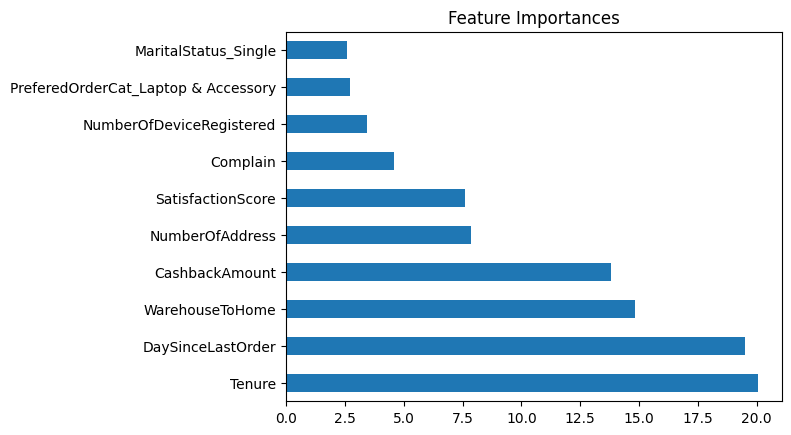

In [194]:
feature_final = misval_kolom + pipeline_model['preprocess'].transformers_[1][1].get_feature_names_out().tolist() + ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'CashbackAmount']

feat_imp = pd.Series(best_model['model'].feature_importances_, feature_final).sort_values(ascending = False).head(10)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan plot di atas, dapat disimpulkan bahwa feature - feature yang berperan penting dalam model Machine Learning yang dibuat antara lain:
1. Tenure
2. Day Since Last Order
3. Warehouse to Home

## **F. Prediction : Pickle**

In [195]:
file_name = 'Model_Final.sav'
pickle.dump(best_model, open(file_name, 'wb'))

# **6. Conclusion & Recommendation**

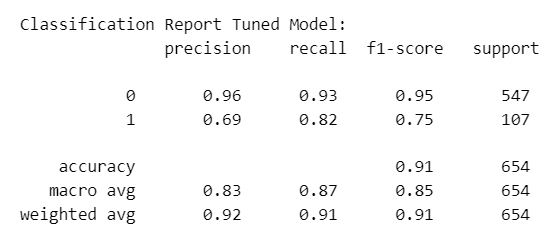

In [196]:
path = "E:/Purwadhika/Course/Module3/CapstoneProject3/image/"
Image(filename = path + "cat.jpg", width=700, height=700)

## **Conclusion**
Berdasarkan hasil classification report dengan menggunakan metode Machine Learning **Cat Boost Classifier**  di atas, dapat disimpulkan bahwa model dapat mengetahui 93% customer yang tidak churn dan 82% customer yang churn berdasarkan recall. Adapun berdasarkan nilai prediksinya, model memiliki kemungkinan prediksi customer benar churn sebesar 69%, sehingga masih ada customer yang churn dan diprediksi sebagai tidak churn sebesar 13%.  

Berdasarkan referensi yang diperoleh, Customer Acquisition Cost (CAC) pada  e-commerce berkisar antara 50 USD untuk mendapatkan 1 customer, diasumsikan biaya untuk mepertahankan 1 customer berkisar antara 20 USD. Apabila terdapat total 3269 customer dengan proporsi 533 customer yang churn dan 2736 customer yang tidak churn, berikut adalah perhitungan biaya promosi:  

**A. Tanpa Model** (Semua customer diberikan promosi)
- Total biaya : 3269 * 20 USD = 65,380 USD
- Total customer churn : 533 customer
- Total customer tidak churn : 2736 customer
- Biaya yang terbuang : 2736 * 20 USD = 54,720 USD  

**B. Dengan Model** (Promosi ditujukan untuk customer terprediksi churn)
- Total biaya : 533 * 20 USD = 10,660 USD
- Total customer churn yang ditemukan : 533 * 0.82 = 437 customer
- Total customer churn yang tidak ditemukan : 96 + (0,13 * 2736) = 451 customer (terprediksi tidak churn, actual churn)
- Total customer tidak churn yang ditemukan : 2736 * 0.93 = 2544 customer
- Total customer tidak churn tidak ditemukan : 2736 - 2544 = 192 customer (terprediksi churn, actual tidak churn)
- Biaya yang sebenarnya terbuang : (192 * 20 USD) + (451 * 50 USD) = 26,390 USD
- Biaya yang dihemat dibandingkan tanpa model : 54,720 USD - 26,390 USD = 28,330 USD  

Dengan penggunaan model, perusahaan dapat menghemat hingga 28,330 USD dibandingkan tanpa model karena pemasaran dilakukan dengan tepat sasaran sehingga mencegah customer churn.  

Berdasarkan Feature Importance, terdapat feature-feature yang mempengaruhi customer churn antara lain :  
1. Tenure
2. Day Since Last Order
3. Warehouse to Home

Referensi:
1. https://scalecrush.io/blog/average-customer-acquisition-cost-ecommerce#:~:text=The%20average%20CAC%20on%20the,to%20acquire%20a%20single%20customer diakses pada 19 Februari 2023 pukul 21.00 WIB.


## **Recommendation**



Rekomendasi yang diberikan terkait sisi business dan model: 

**Business**
1. Terhadap customer baru yang memiliki masa tenure 0-20 bulan memiliki potensi churn, dapat diberikan diskon, kupon, cashback, atau promo-promo menarik lainnya sehingga meningkatkan loyalitas customer dalam menggunakan e-commerce.
2. 1-15 hari sejak pembelanjaan customer, dilakukan follow up ke customer mengenai pengalaman berbelanja serta apresiasi telah menggunakan aplikasi e-commerce dengan memberikan kupon, poin, level, atau reward yang dapat digunakan pada pembelanjaan selanjutnya. Adapun hal ini dikarenakan customer yang churn adalah customer yang memiliki waktu 1-15 dari pembelanjaan terakhir.
3. Diberikan penawaran gratis ongkos kirim pada customer yang berpotensi churn dengan bekerjasama dengan partner jasa ekspedisi.
4. Berdasarkan data customer yang dimiliki, dapat dibuat marketing campaign yang lebih segmented seperti gender, status, kategori item yang disukai.
5. Melakukan review dan komparasi terhadap aplikasi e-commerce dengan kompetitor, seperti kelengkapan produk, tampilan produk, promosi yang ditawarkan, service.
6. Mengembangkan sistem untuk dapat meningkatkan waktu penggunaan aplikasi e-commerce dengan mengembangkan sistem permainan atau live dari toko yang disukai, adapun terhadap customer yang sering check in dan aktif dalam aplikasi dapat diberikan reward berupa poin dan sistem leveling yang akhirnya dapat ditukarkan dengan kupon belanja.

**Model**
1. Ditambahkan feature lainnya terkait faktor churn dari e-commerce sehingga dapat dilihat faktor lainnya yang mempengaruhi customer churn, misalkan ketepatan waktu pengiriman, kemudahan refund, klaim asuransi, customer service, dll.
2. Ditambahkan data sehingga dapat dilakukan cleaning dengan menghilangkan outlier, dengan demikian dapat dilihat apakah outlier berpengaruh signifikan atau tidak terhadap model.
3. Meningkatan evaluation metrics score dengan mengeksplore kombinasi dataset dan feature importances.
4. Melakukan uji pada model machine learning lainnya dan hypertuning kembali.
5. Untuk mengurangi waktu running coding, dilakukan percobaan dengan menggunakan teknik oversampling lainnya seperti Random Over Sampling.
6. Pada level machine learning yang lebih advance, dilakukan pengembangan Recommendation System sehingga customer retention rate menjadi lebih tinggi karena e-commerce menjadi personalized dengan menawarkan produk-produk yang mungkin diminati atau diperlukan customer, misalkan setiap awal bulan ditawarkan produk grocery shopping, pada hari ulang tahun customer ditawarkan produk-produk kesukaan customer.